In [1]:
import anndata as ad
import os, re
import numpy as np
import pandas as pd
from IPython.display import display
import warnings
warnings.filterwarnings("ignore") 

import scipy.sparse as sparse
from scipy.io import mmread
from scipy.stats import pearsonr, pointbiserialr

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

import seaborn as sns
import scanpy as sc
sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 1 # errors (0), warnings (1), info (2), hints (3)
plt.rcParams["font.family"] = "Arial"
sns.set_style("white")

import random
# Note that BANKSY itself is deterministic, here the seeds affect the umap clusters and leiden partition
seed = 1234
np.random.seed(seed)
random.seed(seed)

scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.24.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.11.2 pynndescent==0.5.10


In [ ]:
import igraph

## Load Slide-seq Dataset
Allocate path to folder and the file name of the designated AnnaData Object (in `.h5ad` format) <br>

In [2]:
adata = ad.read_h5ad("data/xenium/raw_data/HW_brain_res.h5ad")
output_path = "data/xenium/processed/HW_brain_res_xy.h5ad"
adata.obs_keys()

import numpy as np
adata.obsm['xy'] = np.vstack([adata.obs['x'], adata.obs['y']]).T

adata.write(output_path)

In [ ]:
adata.obsm_keys()

In [4]:
# Define File paths
#file_path = os.path.join("data", "slide_seq", "v1")
#gcm_filename = "Cerebellum_MappedDGEForR.csv"

# (Optional) Arguments for load_data only if annadata is not present
#locations_filename = "Cerebellum_BeadLocationsForR.csv"
file_path = os.path.join("data", "xenium", "processed")
adata_filename = "HW_brain_res_xy.h5ad"

In [5]:
print(f"Looking for {os.path.join(file_path, adata_filename)}")
print(type(file_path)) 
print(type(adata_filename))

Looking for data/xenium/processed/HW_brain_res_xy.h5ad
<class 'str'>
<class 'str'>


### Loading anndata file or converting raw files to anndata format  (h5ad)

- If the specified anndata file is present in the directory, the annadata file `.h5ad` in the file path can be read directly by setting the `load_adata_directly` to `True` <br>
- Otherwise, if the `AnnData` file is not present, `load_data` can convert the raw data of GCM and locations in `.csv` format to `.h5ad` directly.

In [8]:
from banksy_utils.load_data import load_adata, display_adata

# To either load data from .h5ad directly or convert raw data to .h5ad format
load_adata_directly = True

# Keys to specify coordinate indexes in the anndata Object
coord_keys = ('x', 'y', 'xy')

raw_y, raw_x, adata = load_adata(filepath=file_path, adata_filename=adata_filename, load_adata_directly=True, coord_keys=('x','y','xy'))

Looking for data/xenium/processed/HW_brain_res_xy.h5ad
Attemping to read Annadata directly
Anndata file successfully loaded!
Attempting to concatenate spatial x-y under adata.obsm[xy]
Concatenation success!


In [9]:
import inspect
from banksy_utils.load_data import load_adata

# Inspect the function signature to understand expected arguments
print(inspect.signature(load_adata))

(filepath: str, load_adata_directly: bool, adata_filename: str, gcm_filename: str = '', locations_filename: str = '', coord_keys: Tuple[str] = ('xcoord', 'ycoord', 'xy_coord')) -> anndata._core.anndata.AnnData


### Display Anndata Object
Use `display_adata` to show summary of anndata object

In [11]:
display_adata(adata)

Displaying adata Object and their attributes
Adata attributes and dimensions:


AnnData object with n_obs × n_vars = 435098 × 304
    obs: 'nucleus_area', 'nCount_Xenium', 'nFeature_Xenium', 'segmentation_method', 'nCount_BlankCodeword', 'nFeature_BlankCodeword', 'nCount_ControlCodeword', 'nFeature_ControlCodeword', 'nCount_ControlProbe', 'nFeature_ControlProbe', 'x', 'y', 'cell_area', 'nCount_SCT', 'nFeature_SCT'
    var: 'names'
    obsm: 'xy'

Matrix sparsity: 18912260 filled elements (0.14) out of 132269792
max: 115.0, min: 1.0

Displaying observations (adata.obs)


,nucleus_area,nCount_Xenium,nFeature_Xenium,segmentation_method,nCount_BlankCodeword,nFeature_BlankCodeword,nCount_ControlCodeword,nFeature_ControlCodeword,nCount_ControlProbe,nFeature_ControlProbe,x,y,cell_area,nCount_SCT,nFeature_SCT
aaaaafff-1,19.597813,3.0,3,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,0.0,0,0.0,0,0.0,0,942.045288,1372.313232,35.063688,158.0,57
aaaadpgp-1,14.314532,15.0,10,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,0.0,0,0.0,0,0.0,0,1542.974854,1267.937256,24.768032,170.0,51
aaaaffjc-1,47.278595,36.0,21,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,0.0,0,0.0,0,0.0,0,1533.132446,1331.115967,76.110800,174.0,38
aaaajbjg-1,25.287501,40.0,23,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,0.0,0,0.0,0,0.0,0,1519.025024,1287.323120,61.773768,174.0,43
aaaammgl-1,28.583907,51.0,29,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,0.0,0,0.0,0,0.0,0,1528.771729,1283.947876,66.356949,183.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
oinacenm-1,15.217657,5.0,4,Segmented by nucleus expansion of 5.0µm,0.0,0,0.0,0,0.0,0,1641.960205,12939.414062,13.751201,5.0,4
oinaobkl-1,16.752969,1.0,1,Segmented by nucleus expansion of 5.0µm,0.0,0,0.0,0,0.0,0,1647.601685,12940.141602,37.005866,3.0,1
oinbabol-1,25.739063,23.0,18,Segmented by nucleus expansion of 5.0µm,0.0,0,0.0,0,0.0,0,1648.352539,12947.087891,54.031427,8.0,8
oinbddah-1,19.281719,11.0,7,Segmented by nucleus expansion of 5.0µm,0.0,0,0.0,0,0.0,0,1597.330200,12886.666016,22.712107,10.0,7


Displaying variables (adata.var)


,names
ACER1,ACER1
ACTA2,ACTA2
ADAM12,ADAM12
AHNAK2,AHNAK2
AIF1,AIF1
...,...
VEGFA,VEGFA
VIM,VIM
VWF,VWF
WDFY4,WDFY4


### Preprocessing the Data using `Scanpy` 
We then preprocess the raw data as follows:

1. Making variable names unique (removing duplicate gene names)
2. Filtering out the mitochondria genes (`MT`)
3. We use `scanpy`'s built-in function `sc.pp.calculate_qc_metrics` and adding them in-place in the anndata object

In [ ]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")

# # Calulates QC metrics and put them in place to the adata object
# sc.pp.calculate_qc_metrics(adata, 
#                            qc_vars=["mt"], 
#                            log1p=True, 
#                            inplace=True)

### Get preview of the preprocessed data: 
Display the qc-metrics under its observations and variables 

In [ ]:
display(adata.obs, adata.var)

## Visualize the histogram plot of `total_counts` and `n_genes` (Optional)
We can visualize the unfiltered and filtered histograms for `total_counts` and `n_genes` variables in the adata object <br> 

The filtered histograms are plotted after filtering by the upper threshold of total counts `total_counts_cuttoff`, the upper threshold of n_genes `n_genes_high_cutoff`, and the lower threshold of n_genes

In [ ]:
#display_adata(adata)

In [12]:
from banksy_utils.plot_utils import plot_qc_hist, plot_cell_positions

# # bin options for fomratting histograms
# # Here, we set 'auto' for 1st figure, 80 bins for 2nd figure. and so on
# hist_bin_options = ['auto', 80, 80, 100]

# plot_qc_hist(adata, 
#          total_counts_cutoff = 300, # for visualization
#          n_genes_high_cutoff = 1000, # for visualization
#          n_genes_low_cutoff = 0, # for visualization
#          bin_options = hist_bin_options)

## Do an initial filter of cells by their cell counts, MT count and gene counts
### We can then first filter cells by their counts, MT and gene filters.

In [13]:
from banksy_utils.filter_utils import filter_cells

# # Filter cells with each respective filters
# adata = filter_cells(adata, 
#              min_count=10, 
#              max_count=1000, 
#              MT_filter=0, 
#              gene_filter=10)

### Show summary of data after filtering by cell counts and MT

In [ ]:
#display_adata(adata)

### Plot the Histograms of the filtered dataset

In [ ]:
# hist_bin_options = ['auto', 100, 60, 100]

# plot_qc_hist(adata,
#         total_counts_cutoff=2000,
#         n_genes_high_cutoff=2000, 
#         n_genes_low_cutoff= 0,
#         bin_options = hist_bin_options)

### Visualize the position of cells using a scatter plot
For `slideseq_v2`, we customize the plot with a puck_center 

{'fig_size': (6, 6), 's': 0.2, 'c1': 'red', 'c2': 'slateblue', 'label1': 'Original cells', 'label2': 'Remaining cells', 'add_circle': False, 'puck_center': (3330, 3180), 'puck_radius': 2550}


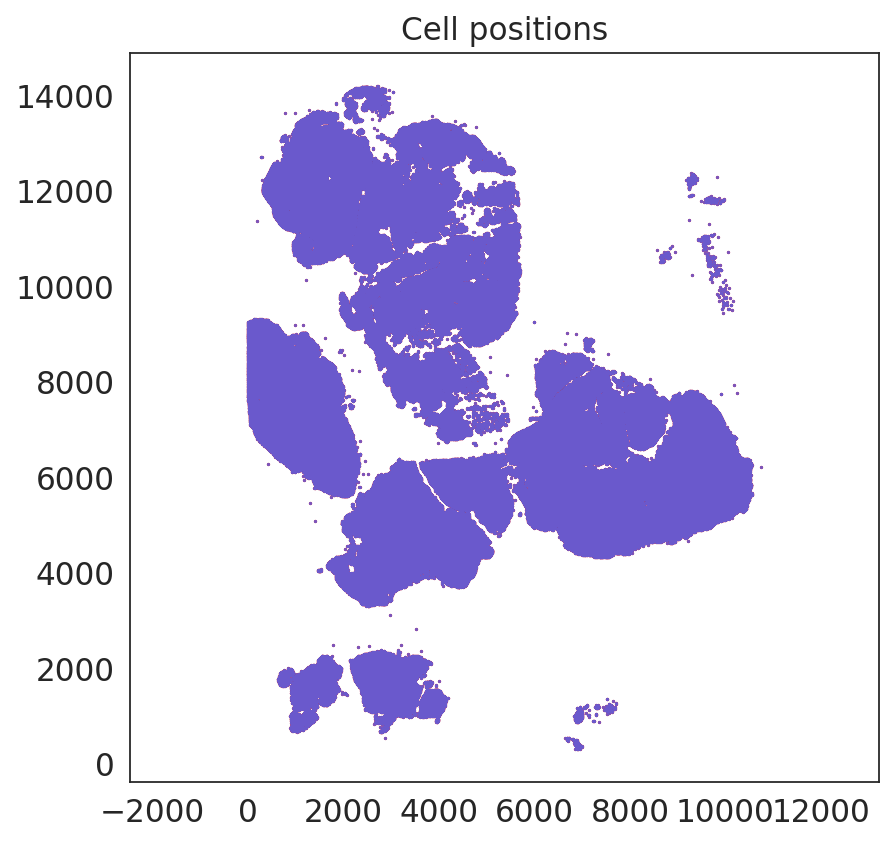

In [14]:
# Visualize cell positions in puck
from banksy_utils.plot_utils import plot_qc_hist, plot_cell_positions
plot_cell_positions(adata,
            raw_x,
            raw_y,
            coord_keys=coord_keys,
            fig_size = (6,6))

## Normalize & Filter highly variable genes (HVG)

### Normalize data matrix using `normalize_total`


In [ ]:
# from banksy_utils.filter_utils import normalize_total, filter_hvg, print_max_min

# # Normalizes the anndata dataset
# adata = normalize_total(adata)

### Filter by Highly Variable Genes (HVG) using a specified threshold

We use the **raw count data** (flavor = `"seurat_v3"`) or **log-transformed data** (flavor = `"seurat"`). Here, we recommend using the default `seurat` flavor from `Scanpy`.

Here we keep the original AnnData object (`adata_allgenes`) for the analysis of the results produced by BANKSY if nessecary. However, we will mostly be running banksy with the filtered AnnData object (`adata`)

In [ ]:
# adata, adata_allgenes = filter_hvg(adata,
#             n_top_genes = 2000,
#             flavor="seurat")

### Check genes and cells annotations

Display attribute of the filtered data after filtering steps and HVG analysis

In [ ]:
# display_adata(adata)

## Generate spatial weights graph

#### In BANKSY, we imagine edges / connections in the graph to represent neighbour relationships between cells

In doing so, the banksy algorithm requires the following specifications in the main BANKSY algorithm:

1. The number of spatial neighbours `num_neighbours`, this is also known as the $k_{geom}$ parameter in the manuscript.
    
2. Assigning weights (dependent on inter-cell spatial distances) to edges in the connected spatial graph. By default, we use the `gaussian decay` option, where weights decay as a function of distnace to the index cell with $\sigma$ = `sigma`. As default, we set $\sigma$ to be the median distance between cells, and do not prescribe any cutoff-radius `p_outside` (no cutoff is conducted).

3. The Azumithal Gabor Filter parameter `max_m` which indicates whether to use the AGF (`max_m = 1`) or just the mean expression (`max_m = 0`). By default, we set `max_m = 1`.
    
    
### Construction of the spatial $k_{geom}$ Nearest-Neighbour graph

We represent connections between cells and its neighbours in a graph $G = \{N,E,W\}$, comprising of a set of nodes $n \in N$. edges representing connectivity between cells $e \in E$, the edges are be weighted $w \in W$ as a function of the spatial distance between cells.
    
Weight of edges can be represented by uniform distance (i.e., a closer neighbour will have a higher weight), or using `reciprocal` ($\frac{1}{r})$. As mentioned above, BANKSY by default applies a gaussian envelope function to map the distance (between nodes) to the `weights` the connection of cell-to-neighbor

In [15]:
from banksy.main import median_dist_to_nearest_neighbour

# set params
# ==========
plot_graph_weights = True
k_geom = 15 # only for fixed type
max_m = 1 # azumithal transform up to kth order
nbr_weight_decay = "scaled_gaussian" # can also be "reciprocal", "uniform" or "ranked"

# Find median distance to closest neighbours, the median distance will be `sigma`
nbrs = median_dist_to_nearest_neighbour(adata, key = coord_keys[2])


Median distance to closest cell = 7.414970196166861

---- Ran median_dist_to_nearest_neighbour in 3.82 s ----



### Generate spatial weights from distance

Here, we generate the spatial weights using the gaussian decay function from the median distance to the k-th nearest neighbours as specified earlier.

The utility functions `plot_edge_histograms`, `plot_weights`, `plot_theta_graph` can be used to visualize the characteristics of the edges, weights and theta (from the AGF) respectively.

### Optional Visualization of Weights and edge graphs

(1) **Visualize the edge histogram** to show the histogram of distances between cells and the weights between cells by setting `plt_edge_hist = True`

(2) **Visualize weights** by plotting the connections. Line thickness is proportional to edge weight (normalized by highest weight across all edges) by setting `plt_weights = True`

(3) **Visualize weights with Azimuthal angles**. Visualizing the azimuthal angles computed by the AGF by colour, the azimuthal connectivities are annotated in red. Warning: this plot many take a few minutes to compute for large datasets. By default, `plt_agf_angles = False`

(4) **Visualize angles around random cell**. Plot points around a random index cell, annotated with angles from the index cell. `plot_theta = True`


Median distance to closest cell = 7.414970196166861

---- Ran median_dist_to_nearest_neighbour in 3.92 s ----

---- Ran generate_spatial_distance_graph in 8.70 s ----

---- Ran row_normalize in 1.34 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 19.81 s ----

----- Plotting Edge Histograms for m = 0 -----

Edge weights (distances between cells): median = 16.043162210039497, mode = 13.154354064139754

---- Ran plot_edge_histogram in 0.18 s ----


Edge weights (weights between cells): median = 0.05906229011515775, mode = 0.032534003471474594

---- Ran plot_edge_histogram in 0.17 s ----

---- Ran generate_spatial_distance_graph in 12.60 s ----

---- Ran theta_from_spatial_graph in 3.17 s ----

---- Ran row_normalize in 1.32 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 27.25 s ----

----- Plotting Edge Histograms for m = 1 -----

Edge weights (distances between cells): median = 22.42646070101234, mode = 19.631877695596472

---- Ran plot_edge_histogram in 0.32 s ----




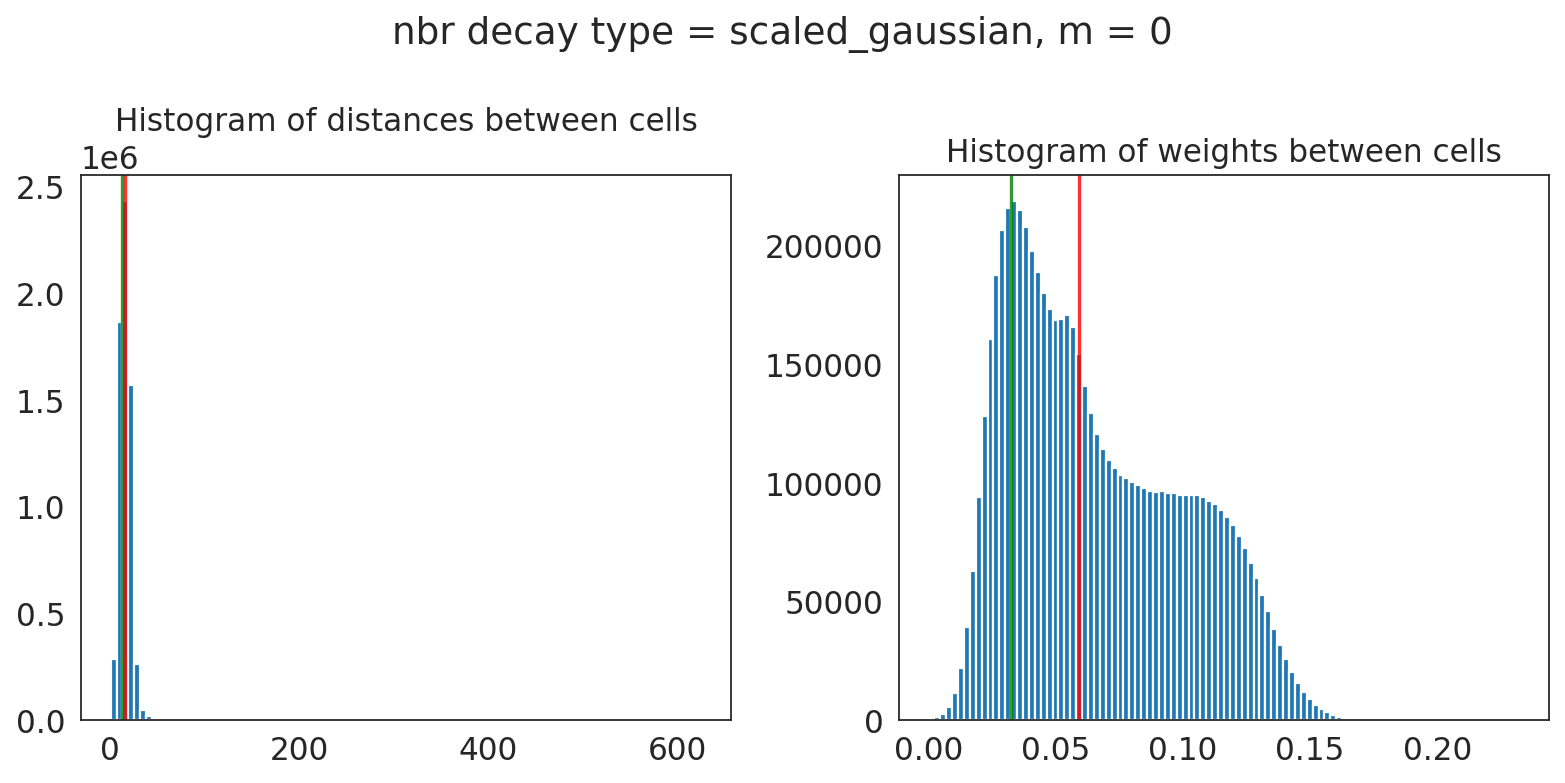

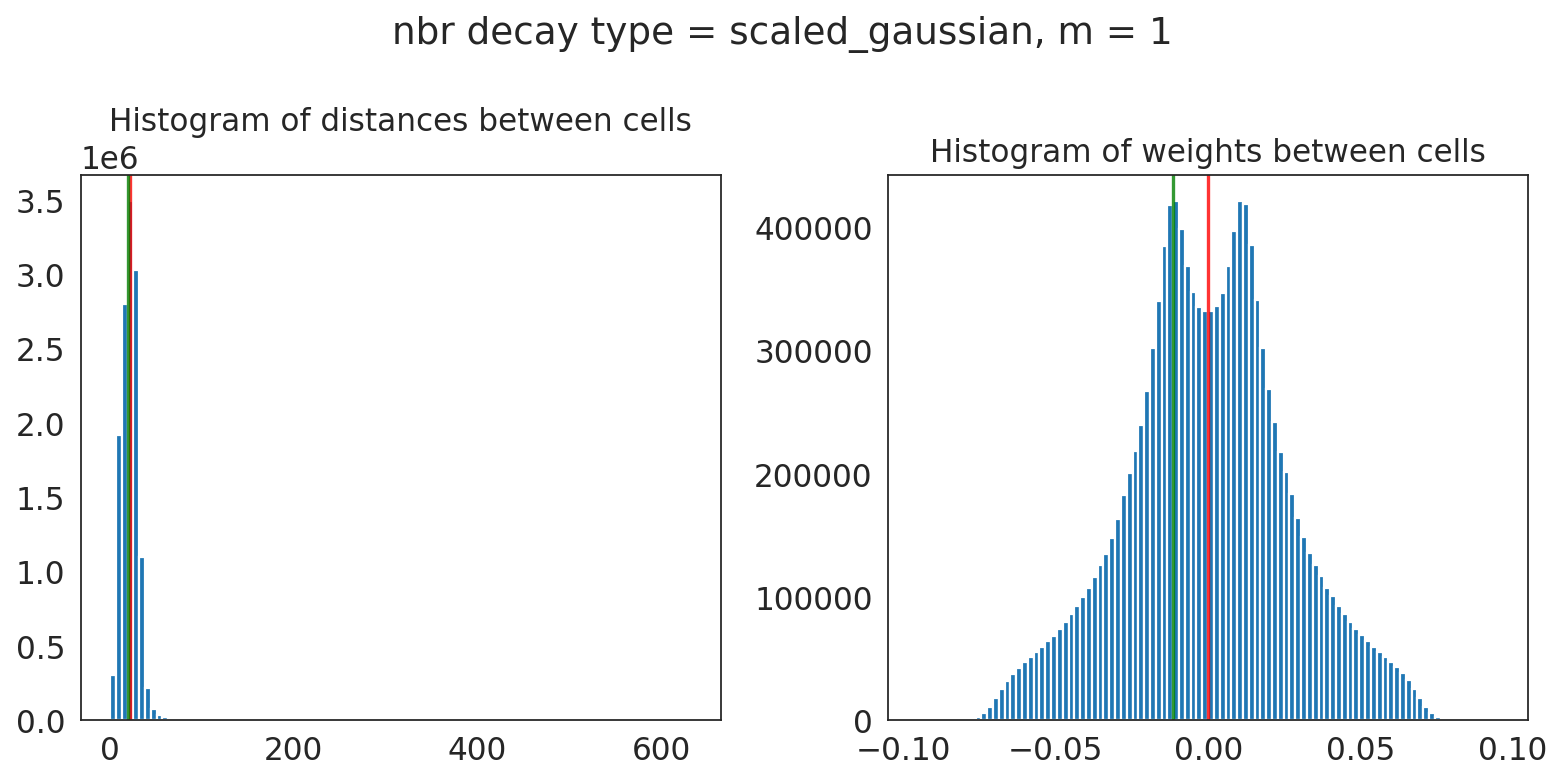

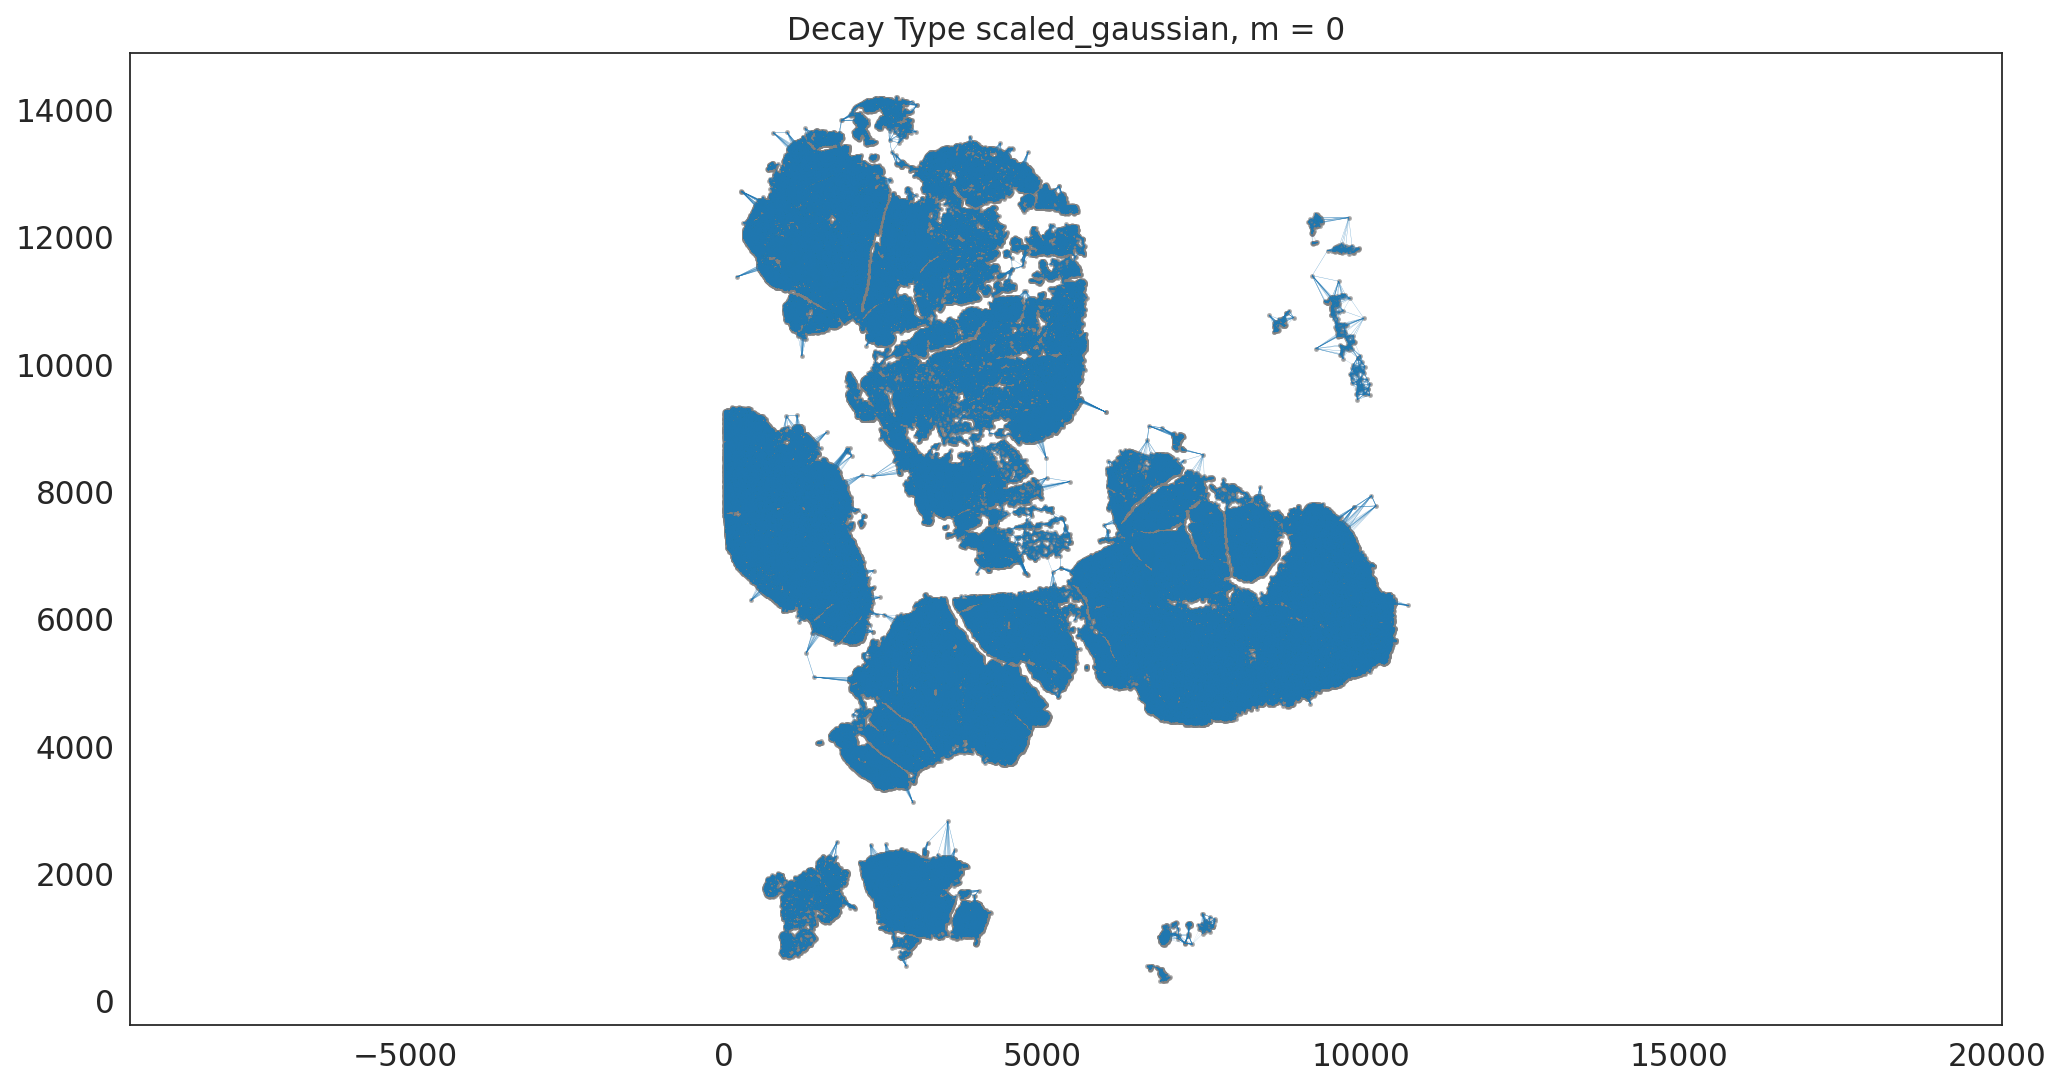

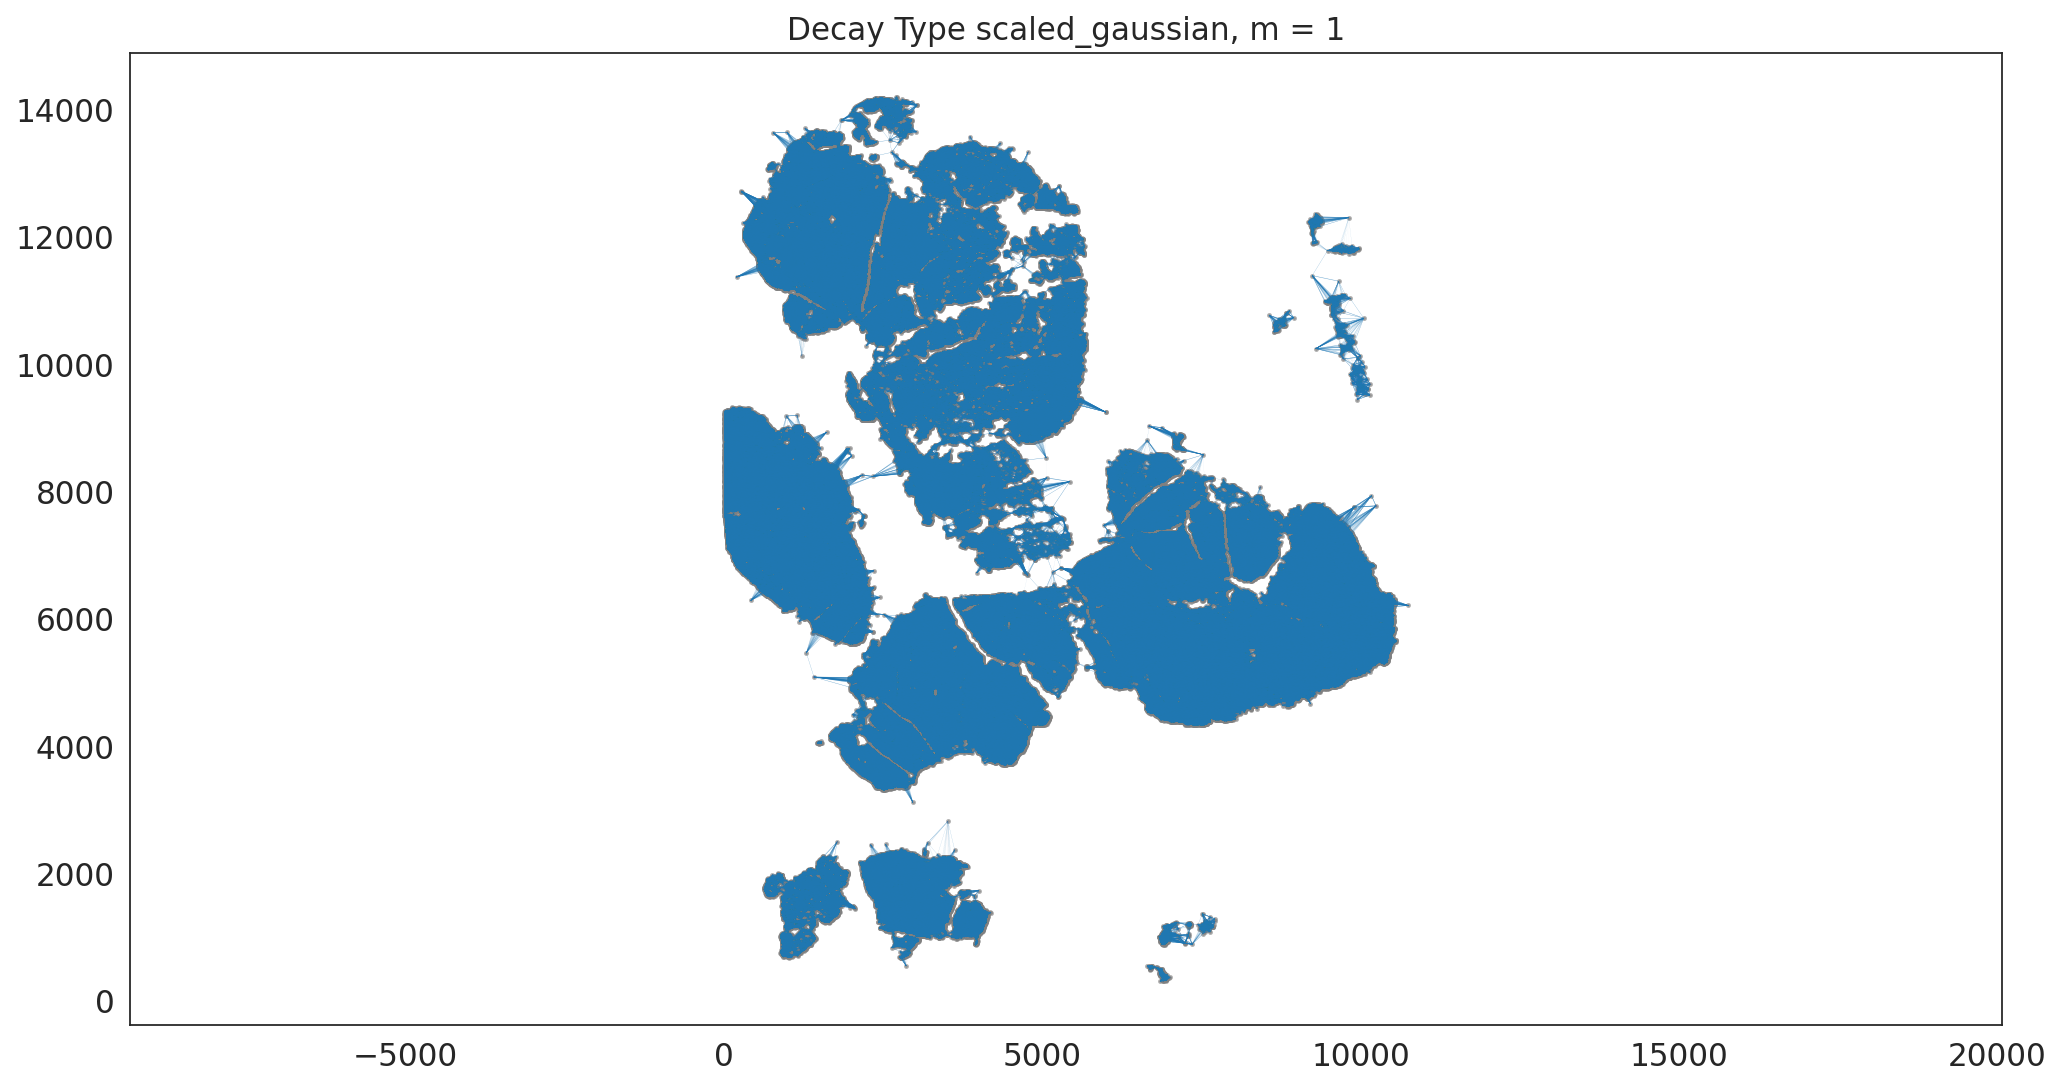

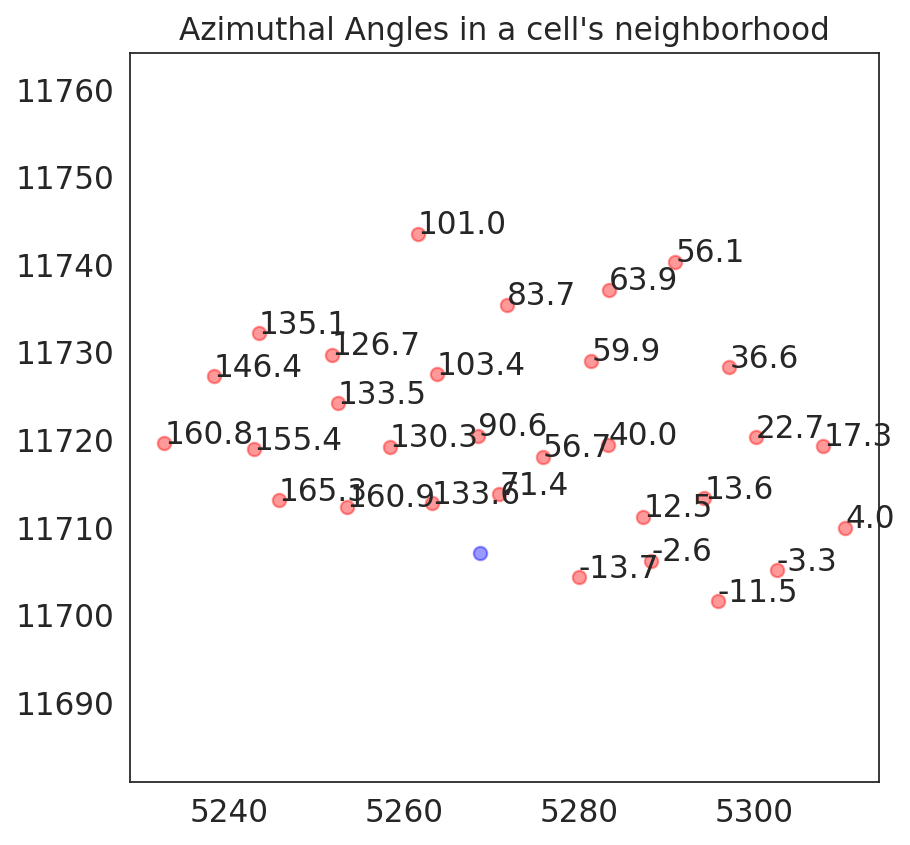

In [16]:
from banksy.initialize_banksy import initialize_banksy

banksy_dict = initialize_banksy(
    adata,
    coord_keys,
    k_geom,
    nbr_weight_decay=nbr_weight_decay,
    max_m=max_m,
    plt_edge_hist=True,
    plt_nbr_weights=True,
    plt_agf_angles=False, # takes long time to plot
    plt_theta=True,
)

## Generate BANKSY matrix

To generate the BANKSY matrix, we proceed with the following:

1. Matrix multiply sparse CSR weights matrix with cell-gene matrix to get **neighbour matrix** and the **AGF matrix** if `max_m` > 1
2. Z-score both matrices along **genes**
3. Multiply each matrix by a weighting factor $\lambda$ (We refer to this parameter as `lambda` in our manuscript and code)
4. Concatenate the matrices along the genes dimension in the form -> `horizontal_concat(cell_mat, nbr_mat, agf_mat)`

Here, we save all the results in the dictionary (`banksy_dict`), which contains the results from the subsequent operations for BANKSY. 

In [17]:
from banksy.embed_banksy import generate_banksy_matrix

# The following are the main hyperparameters for BANKSY
resolutions = [0.3, 0.5, 0.7] # clustering resolution for UMAP
pca_dims = [20] # Dimensionality in which PCA reduces to
lambda_list = [0.2, 0.5, 0.8] # list of lambda parameters

banksy_dict, banksy_matrix = generate_banksy_matrix(adata, banksy_dict, lambda_list, max_m)

Runtime May-13-2025-10-20

304 genes to be analysed:
Gene List:
Index(['ACER1', 'ACTA2', 'ADAM12', 'AHNAK2', 'AIF1', 'AKR1C1', 'ALOX5AP',
       'APCDD1', 'APOD', 'AQP1',
       ...
       'TYR', 'TYROBP', 'TYRP1', 'UBE2C', 'VCAM1', 'VEGFA', 'VIM', 'VWF',
       'WDFY4', 'ZNF667-AS1'],
      dtype='object', length=304)

Check if X contains only finite (non-NAN) values
Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <435098x435098 sparse matrix of type '<class 'numpy.float64'>'
	with 6526470 stored elements in Compressed Sparse Row format>, 1: <435098x435098 sparse matrix of type '<class 'numpy.complex128'>'
	with 13052940 stored elements in Compressed Sparse Row format>}}

Nbr matrix | Mean: 0.51 | Std: 1.69
Size of Nbr | Shape: (435098, 304)
Top 3 entries of Nbr Mat:

[[0.         0.         0.        ]
 [0.         0.         0.15404976]
 [0.         0.03010099 0.        ]]

AGF matrix | Mean: 0.12 | Std: 0.3
Size of AGF mat (m = 1) | Shape: (435098, 304)
Top entries of A

### Append Non-spatial results to the `banksy_dict` for comparsion

In [18]:
from banksy.main import concatenate_all

banksy_dict["nonspatial"] = {
    # Here we simply append the nonspatial matrix (adata.X) to obtain the nonspatial clustering results
    0.0: {"adata": concatenate_all([adata.X], 0, adata=adata), }
}

print(banksy_dict['nonspatial'][0.0]['adata'])

Scale factors squared: [1.]
Scale factors: [1.]
AnnData object with n_obs × n_vars = 435098 × 304
    obs: 'nucleus_area', 'nCount_Xenium', 'nFeature_Xenium', 'segmentation_method', 'nCount_BlankCodeword', 'nFeature_BlankCodeword', 'nCount_ControlCodeword', 'nFeature_ControlCodeword', 'nCount_ControlProbe', 'nFeature_ControlProbe', 'x', 'y', 'cell_area', 'nCount_SCT', 'nFeature_SCT'
    var: 'names', 'is_nbr', 'k'


## Reduce dimensions of each data matrix
We utilize two common methods for dimensionality reduction:

1. PCA (using `scikit-learn`), we reduce the size of the matrix from $3*N_{genes}$ to `pca_dims`. As a default settings, we reduce to 20 dimensions.
2. UMAP (`UMAP` package), which we use to visualize expressions of clusters in the umap space (2-D space).

In [19]:
from banksy_utils.umap_pca import pca_umap

pca_umap(banksy_dict,
         pca_dims = pca_dims,
         add_umap = True,
         plt_remaining_var = False,
         )

Current decay types: ['scaled_gaussian', 'nonspatial']

Reducing dims of dataset in (Index = scaled_gaussian, lambda = 0.2)

Setting the total number of PC = 20
Original shape of matrix: (435098, 912)
Reduced shape of matrix: (435098, 20)
------------------------------------------------------------
min_value = -26.503774237412433, mean = 1.0113595956352397e-15, max = 37.640704573052865

Conducting UMAP and adding embeddings to adata.obsm["reduced_pc_20_umap"]
UMAP embedding
------------------------------------------------------------
shape: (435098, 2)


AxisArrays with keys: reduced_pc_20, reduced_pc_20_umap

Reducing dims of dataset in (Index = scaled_gaussian, lambda = 0.5)

Setting the total number of PC = 20
Original shape of matrix: (435098, 912)
Reduced shape of matrix: (435098, 20)
------------------------------------------------------------
min_value = -31.83963345894112, mean = 4.258376820321025e-15, max = 39.35135130034701

Conducting UMAP and adding embeddings to adata.obsm

### Cluster cells using a partition algorithm

For the purpose of this dataset, we cluster cells using the `leiden` algorithm (use `!pip install leidenalg` if package missing) partition methods. Other clustering algorithms include `louvain` (another resolution based clustering algorithm), or `mclust` (a clustering based on gaussian mixture model). 

Note that by default, we recommend resolution-based clustering (i.e., `leiden` or `louvain`) if no prior information on the number of clusters known. However, if the number of clusters is known *a priori*, the user can use `mclust` (gaussian-mixture model) by specifying the number of clusters beforehand.

In [20]:
from banksy.cluster_methods import run_Leiden_partition

results_df, max_num_labels = run_Leiden_partition(
    banksy_dict,
    resolutions,
    num_nn = 50,
    num_iterations = -1,
    partition_seed = seed,
    match_labels = True,
)

Decay type: scaled_gaussian
Neighbourhood Contribution (Lambda Parameter): 0.2
reduced_pc_20 

reduced_pc_20_umap 

PCA dims to analyse: [20]

Setting up partitioner for (nbr decay = scaled_gaussian), Neighbourhood contribution = 0.2, PCA dimensions = 20)


Nearest-neighbour weighted graph (dtype: float64, shape: (435098, 435098)) has 21754900 nonzero entries.
---- Ran find_nn in 6639.87 s ----


Nearest-neighbour connectivity graph (dtype: int16, shape: (435098, 435098)) has 21754900 nonzero entries.

(after computing shared NN)
Allowing nearest neighbours only reduced the number of shared NN from 589819946 to 21611750.


Shared nearest-neighbour (connections only) graph (dtype: int16, shape: (435098, 435098)) has 18362588 nonzero entries.

Shared nearest-neighbour (number of shared neighbours as weights) graph (dtype: int16, shape: (435098, 435098)) has 18362588 nonzero entries.

sNN graph data:
[ 8  5  8 ... 13 16 12]

---- Ran shared_nn in 31.80 s ----


-- Multiplying sNN connecti

,decay,lambda_param,num_pcs,resolution,num_labels,labels,adata,relabeled
nonspatial_pc20_nc0.00_r0.30,nonspatial,0.0,20,0.3,9,"Label object:\nNumber of labels: 9, number of ...",[[[View of AnnData object with n_obs × n_vars ...,"Label object:\nNumber of labels: 9, number of ..."
nonspatial_pc20_nc0.00_r0.50,nonspatial,0.0,20,0.5,13,"Label object:\nNumber of labels: 13, number of...",[[[View of AnnData object with n_obs × n_vars ...,"Label object:\nNumber of labels: 13, number of..."
nonspatial_pc20_nc0.00_r0.70,nonspatial,0.0,20,0.7,18,"Label object:\nNumber of labels: 18, number of...",[[[View of AnnData object with n_obs × n_vars ...,"Label object:\nNumber of labels: 18, number of..."
scaled_gaussian_pc20_nc0.20_r0.30,scaled_gaussian,0.2,20,0.3,8,"Label object:\nNumber of labels: 8, number of ...",[[[View of AnnData object with n_obs × n_vars ...,"Label object:\nNumber of labels: 8, number of ..."
scaled_gaussian_pc20_nc0.20_r0.50,scaled_gaussian,0.2,20,0.5,12,"Label object:\nNumber of labels: 12, number of...",[[[View of AnnData object with n_obs × n_vars ...,"Label object:\nNumber of labels: 12, number of..."
scaled_gaussian_pc20_nc0.20_r0.70,scaled_gaussian,0.2,20,0.7,17,"Label object:\nNumber of labels: 17, number of...",[[[View of AnnData object with n_obs × n_vars ...,"Label object:\nNumber of labels: 17, number of..."
scaled_gaussian_pc20_nc0.50_r0.30,scaled_gaussian,0.5,20,0.3,9,"Label object:\nNumber of labels: 9, number of ...",[[[View of AnnData object with n_obs × n_vars ...,"Label object:\nNumber of labels: 9, number of ..."
scaled_gaussian_pc20_nc0.50_r0.50,scaled_gaussian,0.5,20,0.5,13,"Label object:\nNumber of labels: 13, number of...",[[[View of AnnData object with n_obs × n_vars ...,"Label object:\nNumber of labels: 13, number of..."
scaled_gaussian_pc20_nc0.50_r0.70,scaled_gaussian,0.5,20,0.7,14,"Label object:\nNumber of labels: 14, number of...",[[[View of AnnData object with n_obs × n_vars ...,"Label object:\nNumber of labels: 14, number of..."
scaled_gaussian_pc20_nc0.80_r0.30,scaled_gaussian,0.8,20,0.3,7,"Label object:\nNumber of labels: 7, number of ...",[[[View of AnnData object with n_obs × n_vars ...,"Label object:\nNumber of labels: 7, number of ..."


## Plot results

### Visualize the clustering results from BANKSY, including the clusters from the Umap embbedings

In [ ]:
from banksy.plot_banksy import plot_results

c_map =  'tab20' # specify color map
weights_graph =  banksy_dict['scaled_gaussian']['weights'][0]

plot_results(
    results_df,
    weights_graph,
    c_map,
    match_labels = True,
    coord_keys = coord_keys,
    max_num_labels  =  max_num_labels, 
    save_path = os.path.join(file_path, 'tmp_png'),
    save_fig = True, # save the spatial map of all clusters
    save_seperate_fig = True, # save the figure of all clusters plotted seperately
)

Saving figure at data/xenium/processed/tmp_png/slideseq_mousecerebellum_nonspatial_pc20_nc0.00_r0.30_spatialmap.png
number of labels: 9
---- Ran plot_2d_embeddings in 0.02 s ----

number of labels: 9
---- Ran plot_2d_embeddings in 0.04 s ----

number of labels: 9
---- Ran plot_2d_embeddings in 0.04 s ----

---- Ran row_normalize in 0.00 s ----


matrix multiplying labels x weights x labels-transpose ((9, 435098) x (435098, 435098) x (435098, 9))

Saving figure at data/xenium/processed/tmp_png/slideseq_mousecerebellum_nonspatial_pc20_nc0.00_r0.50_spatialmap.png


### (Data Analysis) Analyzing Results from BANKSY

We manually annotate the cluster layers generated by BANKSY and analyze its generated clusters. <br> However, note that the clusters may differ slightly between versions of different modules due to the randomness in the leiden partition. The annotations below are exclusive to the analysis obtained from our environnment only.

In [ ]:
# from banksy_utils.cluster_utils import pad_clusters, create_spatial_nonspatial_adata,  refine_cell_types

# # Here we manually assign clusters to their identity using a dictionary
# cluster2annotation_spatial = {
#     "0" : "Granular Layer",
#     "2" : "Purkinje/Bergmann",
#     "3" : "Molecular layer interneurons",
#     "4" : "Oligodendrocyte/Polydendrocyte",
#     "5" : "RBC",
# }

# pad_clusters(cluster2annotation_spatial, list(range(max_num_labels)))

In [ ]:
# # Here, most clusters match so copy labels from spatial
# # cluster2annotation_nonspatial = cluster2annotation_spatial.copy()
# # cluster2annotation_nonspatial["4"] = "Purkinje/Bergmann"
# # cluster2annotation_nonspatial["8"] = "other"
# # cluster2annotation_nonspatial["11"] = "Choroid Plexus"
# # cluster2annotation_nonspatial["15"] = "other"

# cluster2annotation_nonspatial = {
#     "0" : "Granular Layer",
#     "2" : "Purkinje/Bergmann",
#     "3" : "Molecular layer interneurons",
#     "4" : "Oligodendrocyte/Polydendrocyte",
#     "5" : "RBC",
# }

# print(cluster2annotation_spatial,"\n", cluster2annotation_nonspatial)

# # save annotations in two different anndata objects (adata_spatial and adata_nonspatial)

# adata_spatial, adata_nonspatial = create_spatial_nonspatial_adata(results_df,
#                                     pca_dims,
#                                     lambda_list, 
#                                     resolutions,
#                                     cluster2annotation_spatial,
#                                     cluster2annotation_nonspatial)

### DE analysis of self genes (only) from BANKSY clustering

combine 2 Granular layer clusters, merge all unknown clusters

In [ ]:
# from banksy_utils.plot_utils import plot_DE_genes, plot_DE_genes_refined, plot_connection_grid, plot_clusters

# cluster2annotation_refine = {
#     "RBC" : "other",
# }

# adata_spatial_filtered, adata_nonspatial_filtered = refine_cell_types(adata_spatial, 
#                                                                       adata_nonspatial,
#                                                                       cluster2annotation_refine
#                                                                       )

In [ ]:
adata_self = plot_DE_genes_refined(adata_spatial_filtered, plot_heatmap = False, save_fig = False)

### Show connection grid

Show heatmap representing how intermingled each cluster is with each other cluster. Arrange clusters (each corresponding to a cell type) in order of layers of the cerebellum, from MLI to Oligo.

In [ ]:
# cell_types = ["Molecular layer interneurons", 
#               "Purkinje/Bergmann", 
#               "Granular Layer",
#               "Oligodendrocyte/Polydendrocyte",]

# plot_connection_grid(
#     banksy_dict["scaled_gaussian"]["weights"][0].copy(),
#     adata_nonspatial,
#     adata_spatial,
#     cell_types= cell_types,
#     save_fig=False
# )

compare **spatial map** of selected clusters side by side:

In [ ]:
# # choose colours for each cluster
# colors_dict = {
#     "Granular Layer": "tab:blue",
#     "Molecular layer interneurons": "tab:orange",
#     "Purkinje/Bergmann": "tab:red",
#     "Oligodendrocyte/Polydendrocyte": "tab:green",
# }

# plot_clusters(
#     adata_spatial,
#     adata_nonspatial,
#     colors_dict,
# )

## Plot DE genes of clusters from scRNAseq reference atlas
Note this requires the RCTD weights from the dropviz.org webpage

In [ ]:
# # display(adata_allgenes)
# print_max_min(adata_allgenes)

# # z-score the unfiltered gene-cell matrix
# # ---------------------------------------
# sc.pp.scale(adata_allgenes)
# # display(adata_allgenes)
# print_max_min(adata_allgenes)

### Get scRNA-seq reference marker genes and compute metagene

Marker genes are obtained from reference scRNA-seq dataset available at **dropviz.org**. 

DE genes are compared against rest of cerebellum with parameters (*default*):
 - Minimum Fold Ratio = 2
 - Minimum P-Value Exponent = -100
 - Min Mean Log Amount in Target = 2.5
 - Max Mean Log amount in Comp = 1
 
Marker genes filtered out in preprocessing are not included.

In [ ]:
# # Metagene Dataframe
# from banksy_utils.cluster_utils import create_metagene_df

# metagene_df = create_metagene_df(adata_allgenes, coord_keys)
# metagene_df.head()

In [ ]:
# from banksy_utils.plot_utils import plot_markergene_sets

# # load weights and locations (need to load locations because filtered seperately)
# rctd_coord_filename = "slideseqv1_mc_coords_filtered.csv"
# rctd_weights_filename = "slideseqv1_mc_RCTDweights.txt"
# rctd_coord = pd.read_csv(os.path.join(file_path, rctd_coord_filename), index_col=0)
# rctd_weights = mmread(os.path.join(file_path, rctd_weights_filename)).todense()

# plot_markergene_sets(metagene_df,
#                      rctd_coord,
#                      rctd_weights,
#                      coord_keys,
#                      save_fig=False)

### Comparison between spatial, nonspatial and RCTD weights

In [ ]:
# from banksy_utils.plot_utils import plot_weights_comparsion

# # We use the layers args to indicate which layers to plot
# # Here the layers are [nonspatial, spatial, RCTD, marker-genes]
# layers1 = [
#     [("Granular Layer", "Granular Layer"), 
#      ("Granular Layer", "Granular Layer"),
#      ("GranularNeuron_Gabra6",), 
#      ("GranularNeuron_Gabra6",)
#     ],
# ]

# plot_weights_comparsion(
#     adata_spatial,
#     adata_nonspatial,
#     adata_allgenes,
#     layers1,
#     colors_dict,
#     rctd_coord=rctd_coord,
#     rctd_weights=rctd_weights,
#     save_fig=False,
#     file_path=file_path,
#     save_png_name="subplots_layers_sseqcerebellum_v1.png"
# )

**Note:** Figure in paper was generated using older version of scanpy, where the MLI and Purkinje layer were merged into a single cluster.
Non-spatial finds more clusters this version (latest versions of Scanpy and other packages), but is still much less accurate than BANKSY

In [ ]:
# layers2 = [
#     [("Purkinje/Bergmann",), 
#      ("Purkinje/Bergmann",), 
#      ("PurkinjeNeuron_Pcp2",),
#      ("PurkinjeNeuron_Pcp2",),
#     ],
#     [("Molecular layer interneurons",),
#      ("Molecular layer interneurons",), 
#      ("Interneurons_Pvalb",),
#      ("Interneurons_Pvalb",)
#     ],
#     [("Oligodendrocyte/Polydendrocyte"),
#      ("Oligodendrocyte/Polydendrocyte"), 
#      ("Oligodendrocyte_Polydendrocyte_Tfr_Tnr",),
#      ("Oligodendrocyte_Polydendrocyte_Tfr_Tnr",)
#     ],
# ]

# plot_weights_comparsion(
#     adata_spatial,
#     adata_nonspatial,
#     adata_allgenes,
#     layers2,
#     colors_dict,
#     rctd_coord=rctd_coord,
#     rctd_weights=rctd_weights,
#     save_fig=False,
#     file_path=file_path,
#     save_png_name="subplots_layers_sseqcerebellum_v1.png"
# )